In [1]:
import sys
import os

classes_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
src_path = os.path.abspath(r"D:\Repositories\PhD\src\functions")
sys.path.append(src_path)
sys.path.append(classes_path)
print(sys.path)

['d:\\Repositories\\PhD\\notebooks\\HHT', 'd:\\Anaconda\\envs\\ai-env-torch\\python310.zip', 'd:\\Anaconda\\envs\\ai-env-torch\\DLLs', 'd:\\Anaconda\\envs\\ai-env-torch\\lib', 'd:\\Anaconda\\envs\\ai-env-torch', '', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32\\lib', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\Pythonwin', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes']


In [2]:
import numpy as np

In [3]:
from hht_graphs import HHT, plot_imfs_compare, plot_instfreq_compare, plot_hilbert_scatter_compare, plot_hilbert_energy_map_compare, plot_marginal_spectrum_compare
hht = HHT(max_imfs=6, max_siftings=100, sd_thresh=0.2, envelope_bc='auto')
import pandas as pd

In [4]:
def print_all_graphs(x_healthy, x_faulty, fs, N_healthy, N_faulty):

    t_healthy = np.arange(N_healthy) / fs
    t_faulty = np.arange(N_faulty) / fs
    res_healthy = hht.transform(x_healthy, fs, t_healthy)
    res_faulty = hht.transform(x_faulty, fs, t_faulty)
    res_healthy_partial = hht.transform(x_healthy[:1000], fs, t_healthy[:1000])
    res_faulty_partial = hht.transform(x_faulty[:1000], fs, t_faulty[:1000])

    plot_imfs_compare(x_healthy[:1000], t_healthy[:1000], res_healthy_partial['imfs'], res_healthy_partial['residual'],
                      x_faulty[:1000], t_faulty[:1000], res_faulty_partial['imfs'], res_faulty_partial['residual'],
                      labels=("Без повреда","С повреда"),
                      title="Собствени модови функции (IMF)")
    
    plot_instfreq_compare(t_healthy[:1000], res_healthy_partial['frequency'], res_healthy_partial['amplitude'],
                          t_faulty[:1000], res_faulty_partial['frequency'], res_faulty_partial['amplitude'],
                          fmax=None, labels=("Без повреда","С повреда"),
                          title="Мигновена честота")
    
    plot_marginal_spectrum_compare(res_healthy['frequency'], res_healthy['amplitude'], t_healthy,
                                   res_faulty['frequency'], res_faulty['amplitude'], t_faulty,
                                   fmax=None, nbins_f=800, power=2.0,
                                   labels=("Без повреда","С повреда"),
                                   title="Граничен спектър на Хилберт")

# Electric Motor

In [5]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\EE_data\1730_case_edu.csv")
df

,DE,FE,fault_diameter,horse_power,rounds_per_minute,fault_end,samples_per_second,fault_element,fault
0,0.014603,0.192922,0,3,1730,0,12000,0,0
1,0.054449,0.164364,0,3,1730,0,12000,0,0
2,0.107646,0.090811,0,3,1730,0,12000,0,0
3,0.133722,0.086496,0,3,1730,0,12000,0,0
4,0.112652,0.099235,0,3,1730,0,12000,0,0
...,...,...,...,...,...,...,...,...,...
3528365,0.091857,0.155118,21,3,1730,2,48000,1,1
3528366,0.028101,-0.093087,21,3,1730,2,48000,1,1
3528367,-0.061238,-0.144956,21,3,1730,2,48000,1,1
3528368,0.079918,0.077803,21,3,1730,2,48000,1,1


## 1730 - fault_end = 1; fs = 12000; fault_element = 1;fault_diameter = 7

In [6]:
df[(df['fault_end'] == 1) & (df['samples_per_second'] == 12000) & (df['fault_element'] == 1)& (df['fault_diameter'] == 7)]

,DE,FE,fault_diameter,horse_power,rounds_per_minute,fault_end,samples_per_second,fault_element,fault
607199,-0.108425,-0.109507,7,3,1730,1,12000,1,1
607200,-0.127105,0.293184,7,3,1730,1,12000,1,1
607201,0.098679,-0.178540,7,3,1730,1,12000,1,1
607202,0.090964,-0.221069,7,3,1730,1,12000,1,1
607203,0.053198,0.305716,7,3,1730,1,12000,1,1
...,...,...,...,...,...,...,...,...,...
1097099,-1.011565,-0.039447,7,3,1730,1,12000,1,1
1097100,-0.527914,0.126971,7,3,1730,1,12000,1,1
1097101,0.886896,-0.034722,7,3,1730,1,12000,1,1
1097102,0.845881,0.112795,7,3,1730,1,12000,1,1


In [7]:
de_healthy = df[(df['fault_end'] == 0) & (df['samples_per_second'] == 12000) & (df['fault_element'] == 0) & (df['fault_diameter'] == 0)]['DE']
de_faulty = df[(df['fault_end'] == 1) & (df['samples_per_second'] == 12000) & (df['fault_element'] == 1) & (df['fault_diameter'] == 7)]['DE']

fe_healthy = df[(df['fault_end'] == 0) & (df['samples_per_second'] == 12000) & (df['fault_element'] == 0) & (df['fault_diameter'] == 0)]['FE']
fe_faulty = df[(df['fault_end'] == 1) & (df['samples_per_second'] == 12000) & (df['fault_element'] == 1) & (df['fault_diameter'] == 7)]['FE']

print(de_healthy.shape)
print(de_faulty.shape)
print(fe_healthy.shape)
print(fe_faulty.shape)

(485643,)
(366988,)
(485643,)
(366988,)


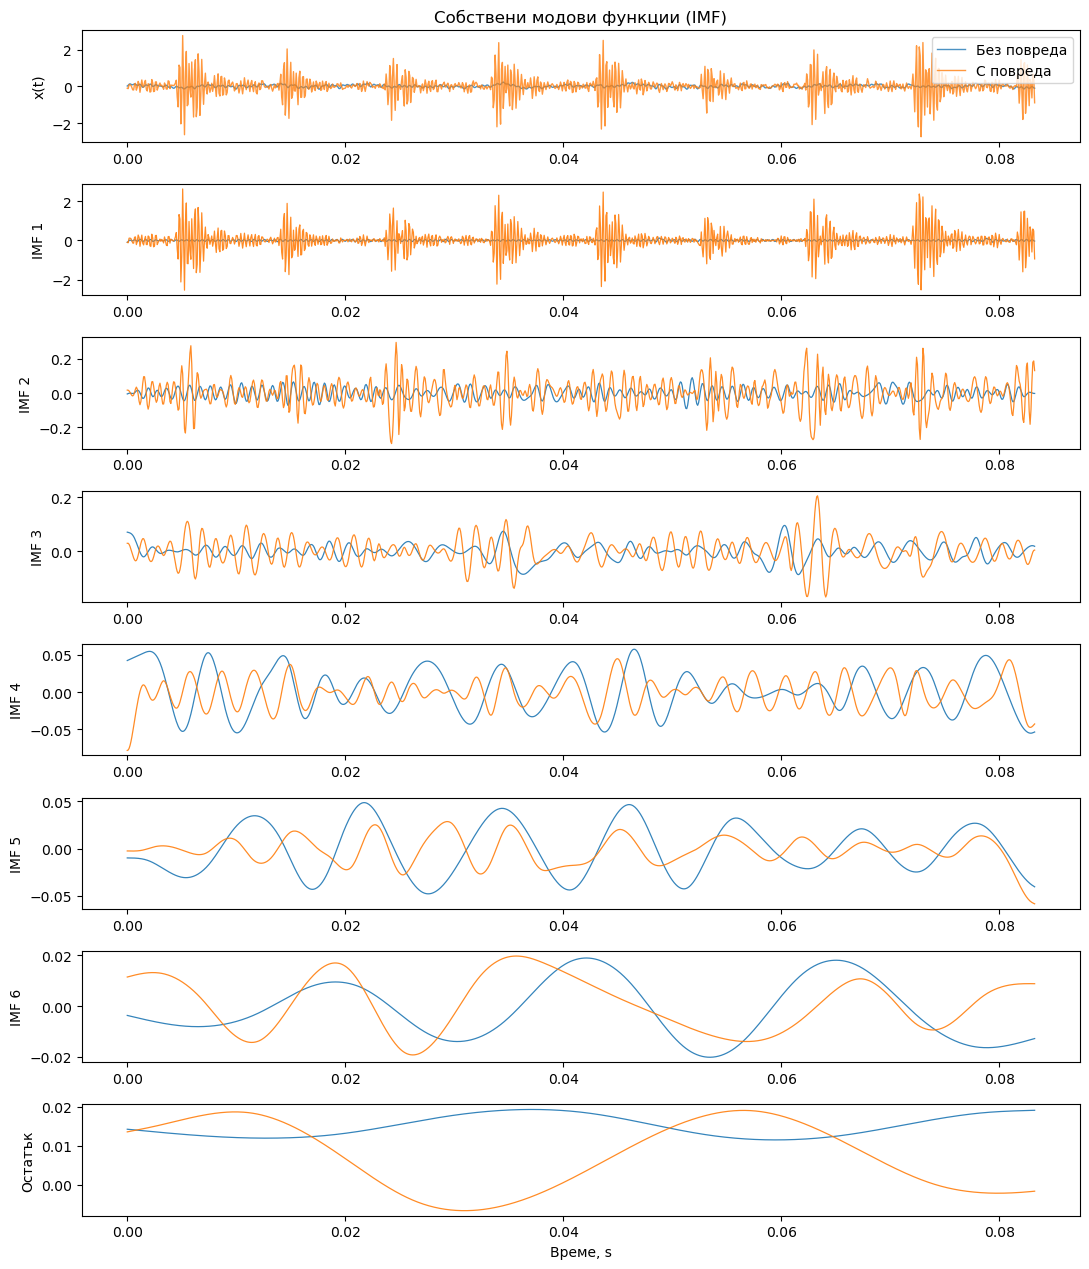

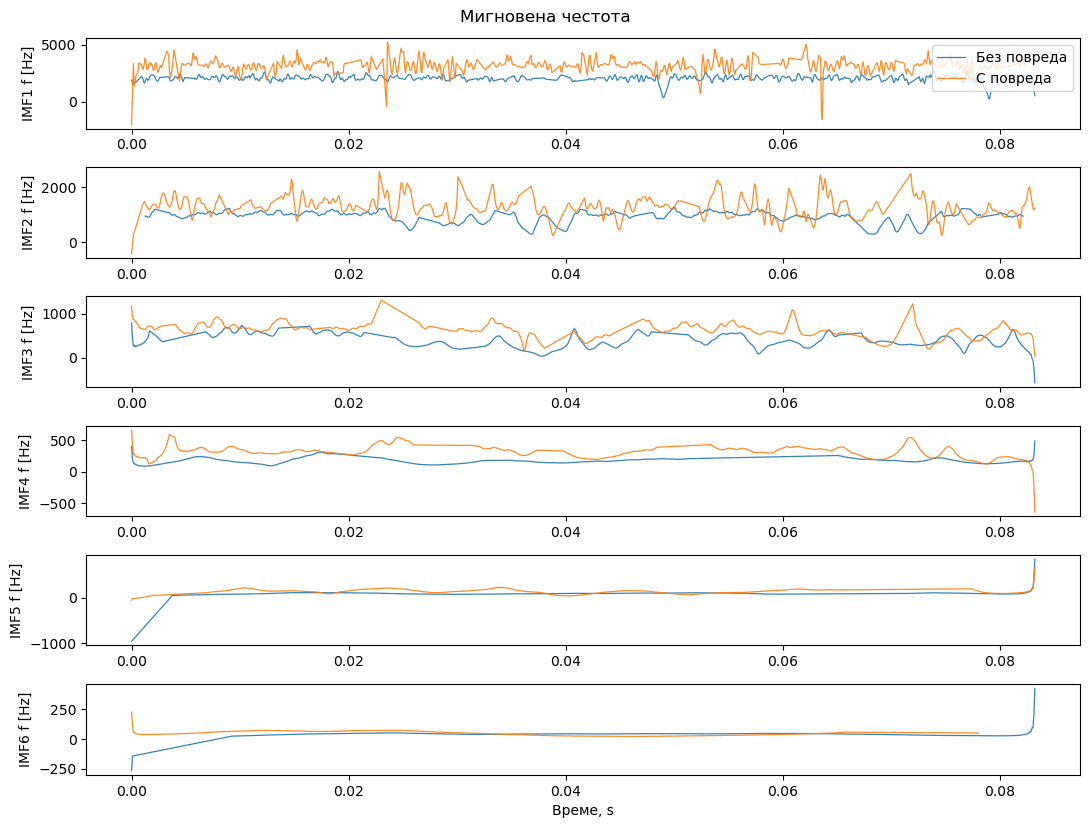

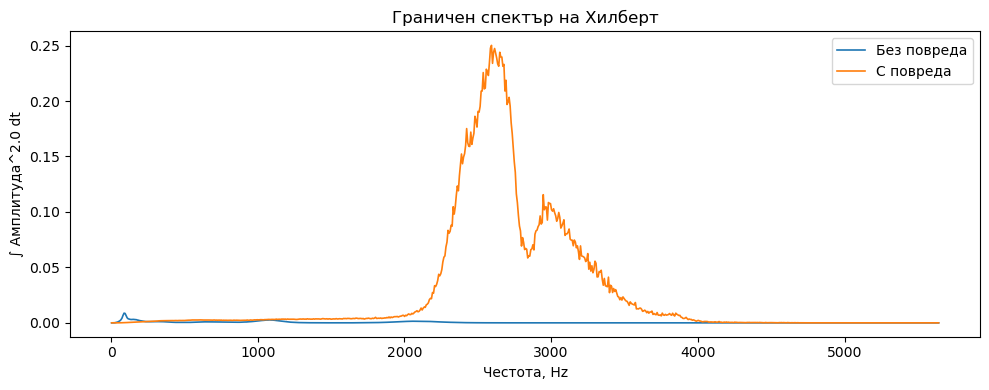

In [8]:
print_all_graphs(de_healthy, de_faulty, fs = 12000, N_healthy=de_healthy.shape[0], N_faulty=de_faulty.shape[0])

## 1730 - fault_end = 1; fs = 12000; fault_element = 1;fault_diameter = 21

## 1797 - fault_end = 1; fs = 12000; fault_element = 1;fault_diameter = 7

## 1797 - fault_end = 1; fs = 12000; fault_element = 1;fault_diameter = 21

# ICE

In [4]:
df_ice = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")
df_ice

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [7]:
df_ice['TEMPERATURE_Celsius'].value_counts()

TEMPERATURE_Celsius
 0     91852
 45    75370
 15    74509
 30    74493
-10    73838
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

def process_ice_signal(signal):
    qt = QuantileTransformer(output_distribution='normal')
    sds = StandardScaler()
    return sds.fit_transform(qt.fit_transform(signal.values.reshape(-1, 1)).flatten())

## RPM = 1000; Humidity = 50%, Temperature = 30

## RPM = 2000; Humidity = 50%; Temperature = 30

## RPM = 1500; Humidity = 50%; Temperature = 30

## RPM = 2000; Humidity = 100%; Temperature = 15